## Progreso de los precios: ¿las propiedades en el AMBA están encareciendo?

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

/home/nicolas/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [4]:
pev.tail(20)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
389574,NaN,2013-11-30,USD,NaN,NaN,NaN,NaN,3429617.0,NaN,NaN,...,NaN,1979.166667,http://www.properati.com.ar/bdlj_venta_departa...,apartment,1.0,NaN,NaN,48.0,NaN,NaN
389575,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,3838574.0,NaN,NaN,...,NaN,NaN,http://www.properati.com.ar/bdll_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
389576,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,3838574.0,NaN,NaN,...,NaN,NaN,http://www.properati.com.ar/bdln_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
389577,NaN,2013-11-30,ARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2177.151429,http://www.properati.com.ar/bdlq_venta_departa...,apartment,1.0,NaN,NaN,35.0,NaN,NaN
389578,NaN,2013-11-30,USD,NaN,NaN,NaN,NaN,3430544.0,NaN,NaN,...,NaN,1724.137931,http://www.properati.com.ar/bdlr_venta_departa...,apartment,1.0,NaN,NaN,29.0,NaN,NaN
389579,NaN,2013-11-30,ARS,NaN,NaN,NaN,NaN,3433359.0,NaN,NaN,...,NaN,232.834250,http://www.properati.com.ar/bdls_venta_casa_it...,house,2.0,NaN,NaN,80.0,NaN,NaN
389580,NaN,2013-11-30,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,http://www.properati.com.ar/bdlu_venta_casa_ma...,house,NaN,NaN,NaN,NaN,NaN,NaN
389581,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/tCT6pJwX3sm-...,...,NaN,NaN,http://www.properati.com.ar/bdlv_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
389582,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/X-pIR36PSjmF...,...,NaN,NaN,http://www.properati.com.ar/bdlw_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
389583,NaN,2013-11-30,ARS,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/0nKDJGPq0rzR...,...,NaN,2370.676000,http://www.properati.com.ar/bdlx_venta_departa...,apartment,NaN,NaN,NaN,30.0,NaN,NaN


In [15]:
# En primer lugar: reduzco el set de datos a registros de capital federal + GBA
#    ['state_name', 'price', 'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2',\
#     'price_usd_per_m2', 'created_on', 'surface']]
pev.dropna(subset=['state_name'], inplace=True)
print(len(pev))
pev_red = pev.loc[(pev.state_name.str.contains('G.B.A|Capital Federal'))\
                   , ['state_name', 'created_on', 'price_usd_per_m2', 'place_name']]
print(len(pev_red))
pev_red.dropna(inplace=True)
print(len(pev_red))
pev_red.head(2000)

131146
91122
55917


,state_name,created_on,price_usd_per_m2,place_name
12,Bs.As. G.B.A. Zona Sur,2016-07-01,2368.421053,Lomas de Zamora
13,Bs.As. G.B.A. Zona Sur,2016-07-01,1301.587302,Banfield
15,Bs.As. G.B.A. Zona Oeste,2016-07-01,659.090909,San Justo
16,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
17,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
18,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
19,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
20,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo
21,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo
22,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo


In [16]:
import calendar
pev_red['Date'] = pd.to_datetime(pev_red['created_on'])
pev_red['Año'] = pev_red['Date'].map(lambda x:x.year)

In [27]:
import matplotlib.patches as mpatches

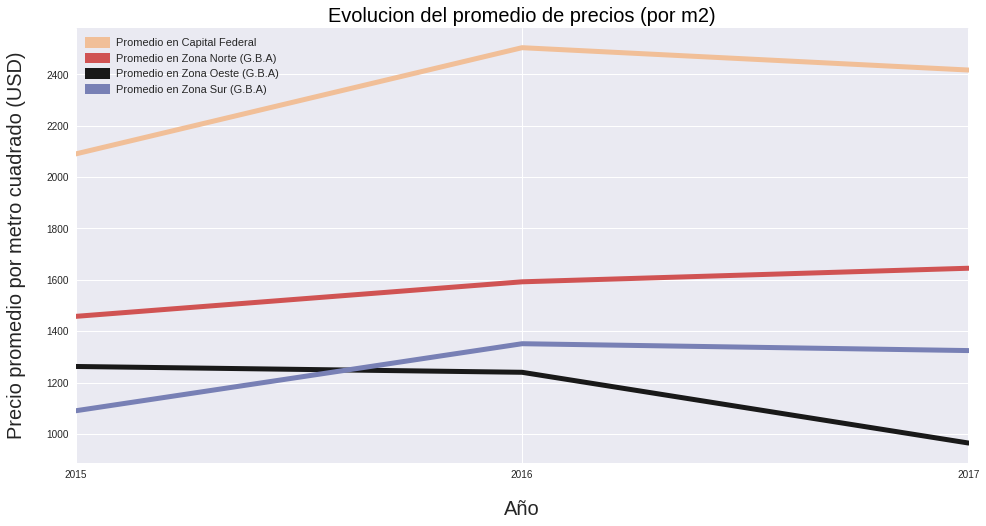

In [62]:
grouped = pev_red.loc[pev_red.state_name.str.contains('Capital Federal'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
grouped2 = pev_red.loc[pev_red.state_name.str.contains('Norte'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

    
f = plt.figure()
plt.xlabel('Anios', size=20.0,labelpad=20.0);
plt.ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
plt.title('Evolucion del promedio de precios (por m2)',\
             color='black',size=20.0)

ax1 = grouped['mean'].plot(linewidth=5.0,figsize=(16,8),color='#F1BF98', ax=f.gca())
ax1_patch=mpatches.Patch(color='#F1BF98', label='Promedio en Capital Federal', lw=3.0)
ax2 = grouped2['mean'].plot(linewidth=5.0,figsize=(16,8),color='#D05353', ax=f.gca())
ax2_patch=mpatches.Patch(color='#D05353', label='Promedio en Zona Norte (G.B.A)', lw=3.0)
ax3 = grouped3['mean'].plot(linewidth=5.0,figsize=(16,8),color='#191919', ax=f.gca())
ax3_patch=mpatches.Patch(color='#191919', label='Promedio en Zona Oeste (G.B.A)', lw=3.0)
ax4 = grouped4['mean'].plot(linewidth=5.0,figsize=(16,8),color='#7880B5', ax=f.gca())
ax4_patch=mpatches.Patch(color='#7880B5', label='Promedio en Zona Sur (G.B.A)', lw=3.0)

plt.legend(handles=[ax1_patch,ax2_patch,ax3_patch,ax4_patch], fontsize=11.0)
plt.xticks(range(2015,2018,1));
plt.show()



#red_patch = mpatches.Patch(color='r', label='Horas pico')
#plt.legend(handles=[red_patch])


In [63]:
grouped2 = pev_red.loc[pev_red.state_name.str.contains('Norte'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

grouped3 = pev_red.loc[pev_red.state_name.str.contains('Oeste'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

grouped4 = pev_red.loc[pev_red.state_name.str.contains('Sur'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
